In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import matplotlib.path as mpath
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

In [2]:
# Load the data
mod_2020 = xr.open_dataset('ERA5_wind_1985-2023.nc')

mod_2020

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, expver: 2, time: 462)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1985-01-15T12:00:00 ... 2023-06-15T12:00:00
Data variables:
    u10        (time, expver, latitude, longitude) float32 ...
    v10        (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-07-15 06:22:46 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
# Select the variable to plot at the chosen date
date = '2020-02-15'
mod_date = mod_2020.sel(time=date, method='nearest').sel(method='nearest').squeeze()

# Compute the wind speed from the u and v components
wind_speed = (mod_date.u10**2 + mod_date.v10**2)**0.5

ValueError: too many values to unpack (expected 2)

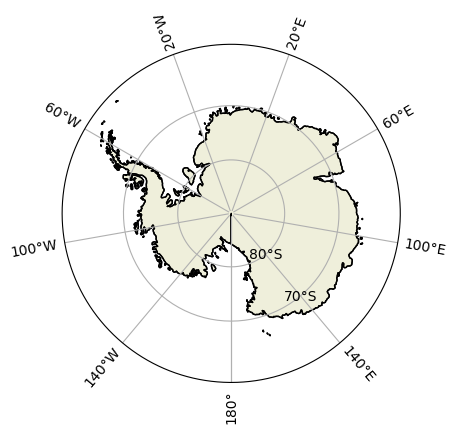

In [4]:
# Create a figure and define its size and projection
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=0.0, globe=None))

# Circular boundary
r_extent = 2950000
r_extent *= 1.2
circle_path = mpath.Path.unit_circle()
circle_path = mpath.Path(circle_path.vertices.copy() * r_extent, circle_path.codes.copy())
ax.set_boundary(circle_path)

ax.coastlines()                                                 # add the coastlines
gl = ax.gridlines(draw_labels=True, xlocs=np.arange(-180, 181, 40), ylocs=np.arange(-90, -60, 10))
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax.set_extent([-180, 180, -55, -90], crs=ccrs.PlateCarree())

# Plot the wind speed using pcolormesh
im = ax.pcolormesh(mod_date['longitude'], mod_date['latitude'], wind_speed,
                   cmap='YlOrRd', vmin=0, vmax=30, transform=ccrs.PlateCarree())

# Add the quiver plot for wind vectors
step_arrows = 8    # reduce the number of arrows
vect = ax.quiver(mod_date['longitude'].data[::step_arrows], mod_date['latitude'].data[::step_arrows],
                 mod_date['u10'].data[::step_arrows, ::step_arrows],
                 mod_date['v10'].data[::step_arrows, ::step_arrows],
                 headlength=4, headwidth=3, scale=3, width=0.002,
                 transform=ccrs.PlateCarree())

# Add the title
fig.suptitle('Wind Speed (m/s)\nDate: {}'.format(date),
            fontsize=18, horizontalalignment='left', x=0.12)  # Display the coordinates on the plot
ax.set_title('Wind Speed (m/s)', fontsize=15)

# Add the colorbar
cbar = fig.colorbar(im, ax=ax, orientation="horizontal", fraction=0.03, pad=0.12)  # add the colorbar
cbar.set_label('m/s', fontsize=20)  # add the title of the colorbar

plt.show()